#### Important Instructions
1. please execute every cell to avoid errors in code 
2. avoid (C:\Users\destroyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in      double_scalars """Entry point for launching an IPython kernel.) as it is not giving any problem in the output 
3. basic explanations are given in markdown cells please go through it and for complete explantion a pdf is attached 
4. Thank you for checking my project wisely :)

## 1.The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [27]:
#all libraries and basic requirements 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import requests
import json 
import collections
from requests.auth import HTTPBasicAuth
from matplotlib.pyplot import figure
df=pd.read_csv('zomato.csv',encoding='latin-1')
df2=df.copy()
df1=df[df2['Country Code']==1]
df1.loc[(df1["City"]=="New Delhi") | (df1["City"]=="Ghaziabad") | (df1["City"]=="Noida") | (df1["City"]=="Gurgaon") | (df1["City"]=="Faridabad"),"City"]="Delhi-NCR"


#### 1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Total restaurants present in Delhi-NCR :  7947
Total restaurants present in rest of India :  705


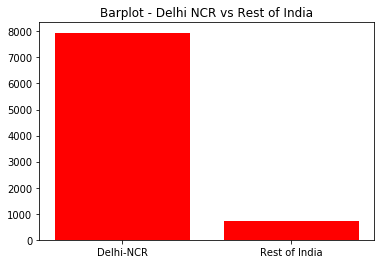

In [5]:

NCR_value=df1.loc[(df1["City"]=="Delhi-NCR") ,"Restaurant Name"].value_counts().values.sum()
#rest_value=df1.loc[(df1["City"]!="New Delhi") & (df1["City"]!="Ghaziabad") & (df1["City"]!="Noida") & (df1["City"]!="Gurgaon") & (df1["City"]!="Faridabad"),"Restaurant Name"].value_counts().values.sum()
rest_value=df1['Restaurant Name'].value_counts().values.sum()-NCR_value
print("Total restaurants present in Delhi-NCR : ",NCR_value)
print("Total restaurants present in rest of India : ",rest_value)
#print(df1.loc[(df1["City"]=="New Delhi") | (df1["City"]=="Ghaziabad") | (df1["City"]=="Noida") | (df1["City"]=="Gurgaon") | (df1["City"]=="Faridabad"),"Restaurant Name"].value_counts().values.sum())
height = [NCR_value,rest_value]
bars = ('Delhi-NCR', 'Rest of India')
plt.title('Barplot - Delhi NCR vs Rest of India')
plt.bar(bars, height,color='red')
plt.show()

#### 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [11]:
#explain that its due to incomplete dataset 
#df2.head(5)
df1.shape
NCR_value=df1.loc[(df1["City"]=="Delhi-NCR"),"Cuisines"]
rest_value=df1.loc[(df1["City"]!="Delhi-NCR"),"Cuisines"]
#print(NCR_value," ",rest_value)
ncr=dict()
rest=dict()
for i in NCR_value:
    a=i.split(',')
    for j in a:
        j=j.strip()
        if j in ncr:
            ncr[j]=ncr[j]+1
        else:
            ncr[j]=1
for i in rest_value:
    b=i.split(',')
    for j in b:
        j=j.strip()
        if j in rest:
            rest[j]=rest[j]+1
        else:
            rest[j]=1

ncr_set=set()
rest_set=set()
for key,values in ncr.items():
    ncr_set.add(key)
for key,values in rest.items():
    rest_set.add(key)
#print(ncr_set)
#print(rest_set)
diff=rest_set-ncr_set
for i in diff:
    print(i)

Cajun
Malwani
German
BBQ


In [252]:
## that its due to incomplete dataset
header={"Accept":"application/json","user-key":"da48ce1d51326bb86cf8f0bf895c5013"}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines?city_id=1',headers=header)

data=response.json()
d=data['cuisines']

for i in d:
    if i['cuisine']['cuisine_name'] == 'Malwani':
        print(True)

True


From the above api code it is clear that restaurants present in Delhi-NCR are serving two of these cuisines i.e BBQ and Malwani.Therefore we can say that dataset is incomplete.

#### 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [8]:

#df2.head(5)
df1.shape
NCR_value=df1.loc[(df1["City"]=="Delhi-NCR"),"Cuisines"]
rest_value=df1.loc[(df1["City"]!="Delhi-NCR"),"Cuisines"]
#print(NCR_value," ",rest_value)
ncr=dict()
rest=dict()
for i in NCR_value:
    a=i.split(',')
    for j in a:
        j=j.strip()
        if j in ncr:
            ncr[j]=ncr[j]+1
        else:
            ncr[j]=1
for i in rest_value:
    b=i.split(',')
    for j in b:
        j=j.strip()
        if j in rest:
            rest[j]=rest[j]+1
        else:
            rest[j]=1

sorted_ncr=sorted(ncr.items(),key=lambda kv:kv[1], reverse=True)[:10]
sorted_rest=sorted(rest.items(),key=lambda kv:kv[1], reverse=True)[:10]
x1=[]
x2=[]
print('Top 10 Cuisines in Delhi NCR')
print()
for i in sorted_ncr:
    print("     ",i[0],i[1])
    x1.append(i[0])
    x2.append(i[1])
t1=[]
t2=[]
print()
print('Top 10 Cuisines in Rest of India')
print()
for i in sorted_rest:
    print("     ",i[0],i[1])
    t1.append(i[0])
    t2.append(i[1])


Top 10 Cuisines in Delhi NCR

      North Indian 3597
      Chinese 2448
      Fast Food 1866
      Mughlai 933
      Bakery 697
      South Indian 569
      Continental 547
      Desserts 542
      Street Food 538
      Italian 535

Top 10 Cuisines in Rest of India

      North Indian 349
      Chinese 242
      Continental 177
      Italian 147
      Cafe 136
      Fast Food 97
      South Indian 62
      Mughlai 59
      Desserts 55
      Mexican 50


#### 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Top 10 Cuisines in Delhi NCR

      North Indian
      Chinese
      Fast Food
      Mughlai
      Bakery
      South Indian
      Continental
      Desserts
      Street Food
      Italian

Top 10 Cuisines in Rest of India

      North Indian
      Chinese
      Continental
      Italian
      Cafe
      Fast Food
      South Indian
      Mughlai
      Desserts
      Mexican


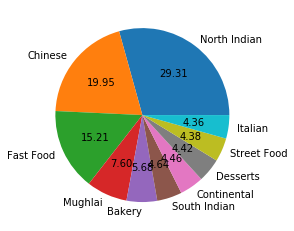

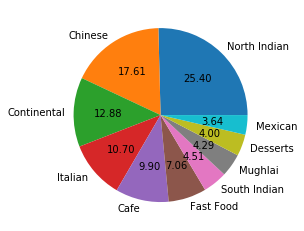

In [9]:

NCR_value=df1.loc[(df1["City"]=="Delhi-NCR"),"Cuisines"]
rest_value=df1.loc[(df1["City"]!="Delhi-NCR"),"Cuisines"]
#print(NCR_value," ",rest_value)
ncr=dict()
rest=dict()
for i in NCR_value:
    a=i.split(',')
    for j in a:
        j=j.strip()
        if j in ncr:
            ncr[j]=ncr[j]+1
        else:
            ncr[j]=1
for i in rest_value:
    b=i.split(',')
    for j in b:
        j=j.strip()
        if j in rest:
            rest[j]=rest[j]+1
        else:
            rest[j]=1
sorted_ncr=sorted(ncr.items(),key=lambda kv:kv[1], reverse=True)[:10]
sorted_rest=sorted(rest.items(),key=lambda kv:kv[1], reverse=True)[:10]
x1=[]
x2=[]
print('Top 10 Cuisines in Delhi NCR')
print()
for i in sorted_ncr:
    print("     ",i[0],)
    x1.append(i[0])
    x2.append(i[1])
t1=[]
t2=[]
print()
print('Top 10 Cuisines in Rest of India')
print()
for i in sorted_rest:
    print("     ",i[0])
    t1.append(i[0])
    t2.append(i[1])
plt.pie(x2,labels = x1,autopct = "%.2f")
plt.show()
plt.pie(t2,labels = t1,autopct = "%.2f")
plt.show()

From the above code and graph we can conclude that North Indian and chinese are very popular cuisines in Delhi-NCR as well as in Rest of India.There are some cuisines which are more pupular in rest of India like mexican,cafe. In Delhi-NCR Street food is loved where as its not the case with rest of India

## 2 User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

#### 2.1.1 Number of Votes given Restaurant

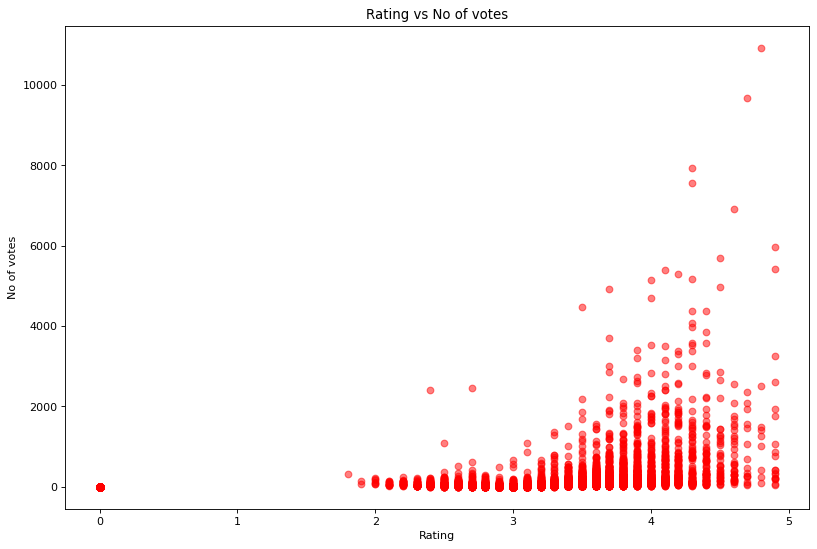

In [70]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='green')
plt.scatter(df1['Aggregate rating'],df1['Votes'],c='r',alpha=0.5)
plt.title('Rating vs No of votes')
plt.ylabel("No of votes")
plt.xlabel("Rating")
plt.show()

#### 2.1.2 Restaurant serving more number of cuisines.

Average rating of restaurants serving one cuisine :  2.0550855666774277


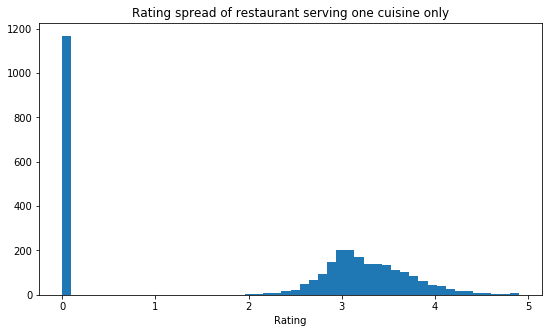

Average rating of restaurants serving multiple cuisine :  2.784374437443748


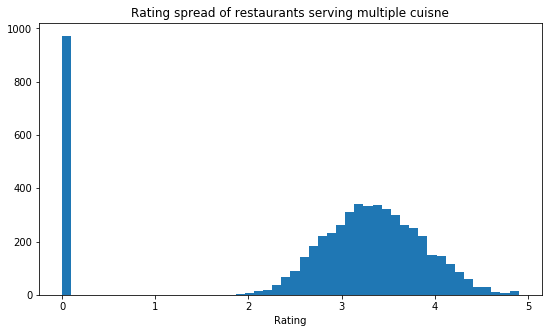

In [92]:
df3=df1.copy()
df3.Cuisines.fillna('Not Known',inplace=True)
df4=df3[~df3['Cuisines'].str.contains(',')] # ~ for not condition 
df5=df3[df3['Cuisines'].str.contains(',')]
print("Average rating of restaurants serving one cuisine : ",df4['Aggregate rating'].mean())
figure(num=None , figsize=(9,5))
plt.hist(df4['Aggregate rating'],bins=50)
plt.title('Rating spread of restaurant serving one cuisine only')
plt.xlabel("Rating")
plt.show()
figure(num=None,figsize=(9,5))
print("Average rating of restaurants serving multiple cuisine : ",df5['Aggregate rating'].mean())
plt.hist(df5["Aggregate rating"],bins=50)
plt.title('Rating spread of restaurants serving multiple cuisne')
plt.xlabel('Rating')
plt.show()

In [94]:
print("Number of restaurants serving One Cuisine having rating below 1 : ",df4[df4['Aggregate rating']<1]['Restaurant ID'].count())
print("Number of restaurants serving Multiple Cuisine having rating below 1 : ",df5[df5['Aggregate rating']<1]['Restaurant ID'].count())

Number of restaurants serving One Cuisine having rating below 1 :  1167
Number of restaurants serving Multiple Cuisine having rating below 1 :  972


#### 2.1.3 Average Cost of Restaurant

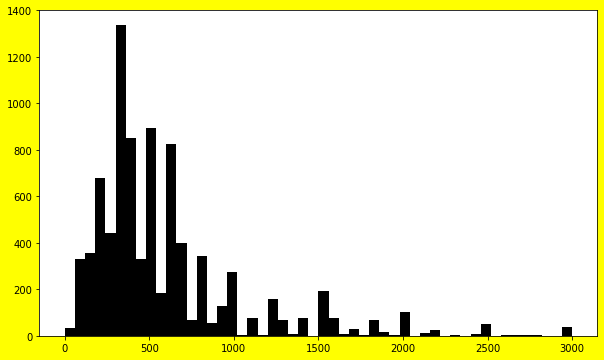

In [100]:
figure(num=None, figsize=(10, 6),facecolor='yellow')
plt.hist(df3['Average Cost for two'],range=[0,3000], facecolor='black', align='mid',bins=50)
plt.show()

This histogram shows us the spread of price for two. We can see that it peaks before 500 ,therefore we can deduce that majority of the restaurants are in the price range of 0-500

(0, 5000)

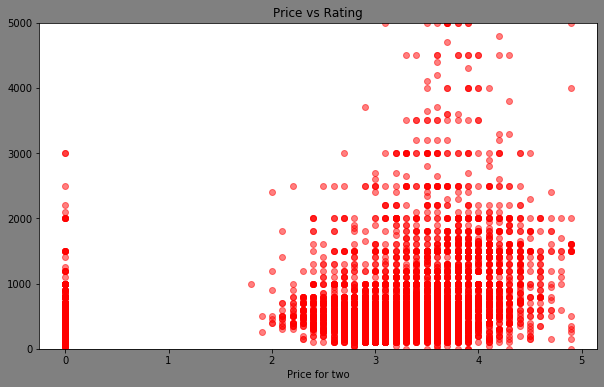

In [104]:
figure(num=None, figsize=(10, 6),facecolor='gray')
plt.scatter(df3['Aggregate rating'],df3['Average Cost for two'],c='r',alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel("Price for two")
plt.ylim(0,5000)

This scatter plot shows us that some of the expensive restaurants are in the range of 3000 or 4000 above are generally high rated

### 2.1.4 Restaurant serving some specific cuisines.

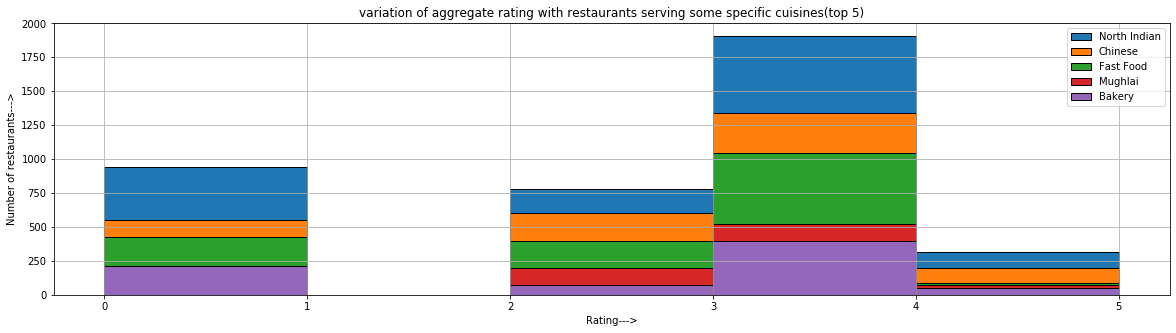

In [37]:
cuisines=df1["Cuisines"]
cuisine=dict()
for i in cuisines:
    a=i.split(',')
    for j in a:
        j=j.strip()
        if j in cuisine:
            cuisine[j]=cuisine[j]+1
        else:
            cuisine[j]=1

popular=sorted(cuisine.items(),key=lambda kv:kv[1], reverse=True)[:5] 
popular_cuisines=[]
for i in popular:
    popular_cuisines.append(i[0])
    
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df1.Cuisines, df1['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating--->')
    plt.ylabel('Number of restaurants--->')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

### 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

#### 2.2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [38]:
print(df2.groupby('Locality').apply(lambda x: (x['Votes']*x['Aggregate rating']).sum()/(x['Votes'].sum())))

C:\Users\destroyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


Locality
 ILD Trade Centre Mall, Sohna Road     2.816667
12th Square Building, Banjara Hills    4.300000
A Hotel, Gurdev Nagar                  3.600000
ARSS Mall, Paschim Vihar               3.100000
Aaya Nagar                             0.000000
                                         ...   
Yusuf Sarai                            3.299463
Z Square Mall, Mall Road               4.000000
Zakir Nagar                            0.000000
Zoo Tiniali                            4.219497
ibis New Delhi, Aerocity               3.100000
Length: 784, dtype: float64


In [39]:
print('The top 10 Weighted Restaurant rating of the complete dataset')
Weightedrating=df2.groupby('Locality').apply(lambda x: (x['Votes']*x['Aggregate rating']).sum()/(x['Votes'].sum()))
Weightedrating.sort_values(ascending=False)[0:10]

The top 10 Weighted Restaurant rating of the complete dataset


C:\Users\destroyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Locality
Old Dutch Hospital, Fort       4.9
The Milk District              4.9
Kenwood                        4.9
Aminabad                       4.9
Deira City Centre Area         4.9
Lexington Street, Soho         4.9
Venetian Village, Al Maqtaa    4.9
DIFC                           4.9
Paia                           4.9
City and Suburban              4.9
dtype: float64

## 3.Visualization

### 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.


Cafe Coffee Day  83
Domino's Pizza  79
Subway  63
Green Chick Chop  51
McDonald's  48
Keventers  34
Giani  29
Pizza Hut  29
Baskin Robbins  28
Barbeque Nation  25
Dunkin' Donuts  22
Giani's  22
Barista  22
Costa Coffee  20
Pind Balluchi  20


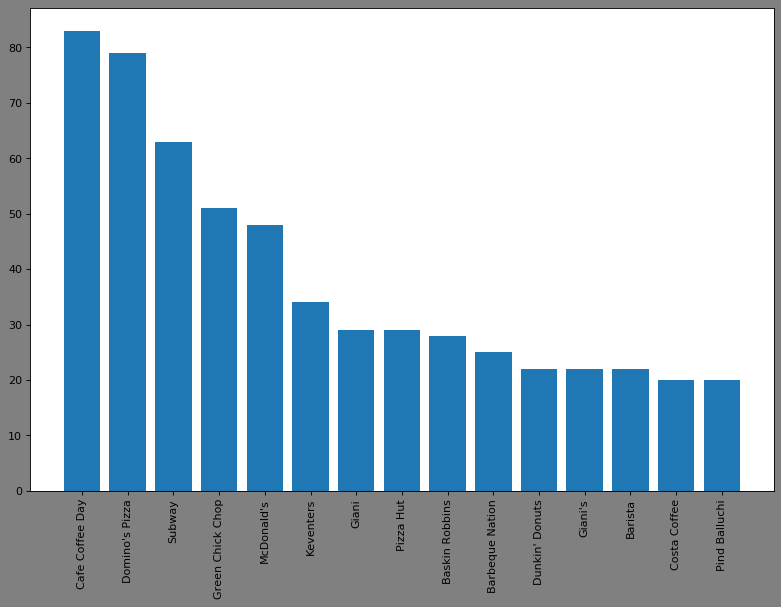

In [123]:
restaurants=df1["Restaurant Name"].value_counts()
#print(restaurants)
sorted_restaurant=sorted(restaurants.items(),key=lambda kv:kv[1], reverse=True)[:15]
#print(sorted_restaurant)
x1=[]
x2=[]
for i in sorted_restaurant:
    print(i[0],"",i[1])
    x1.append(i[0])
    x2.append(i[1])

figure(num=None, figsize=(12, 8), dpi=80, facecolor='gray', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(x1,x2)
plt.show()

The final answer makes good sense as restaurants having most outlets are Huge franchises like - CAFE COFFE DAY, DOMINO'S PIZZA, SUBWAY etc. Through this bar graph we can also see who amongs these franchises is the most popular. CAFE COFFEE DAY AND SUBWAY are close competitors having 83 and 79 outlets respectively

### 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

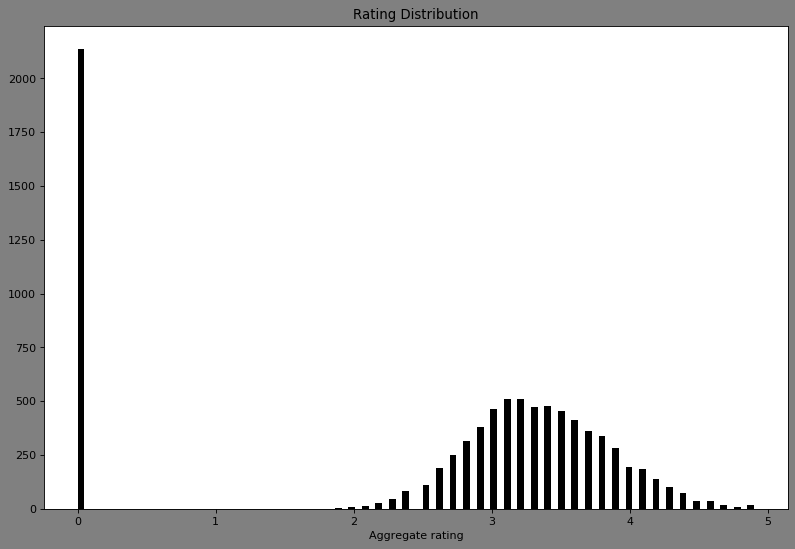

In [130]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='gray', edgecolor='k')
plt.hist(df3['Aggregate rating'],color='black',bins=100)
plt.xlabel("Aggregate rating")
plt.title("Rating Distribution")
plt.show()

We can say that there are many restaurants having rating 0. Rest of the restaurants rating lie between 3 and 3.5. we got a nearly perfect pyramid shape in this histogram

### 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.


Restaurant Name
Barbeque Nation              27835
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Truffles                      9682
Farzi Cafe                    9189
Chili's                       8156
Hauz Khas Social              7931
Joey's Pizza                  7807
Peter Cat                     7574
Name: Votes, dtype: int64


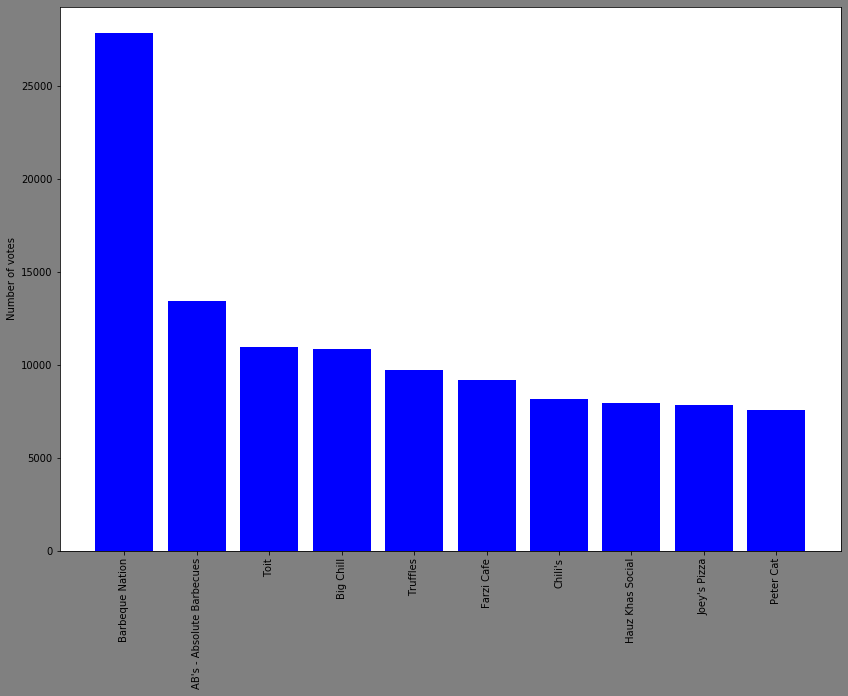

In [145]:
votes=df3.groupby("Restaurant Name")["Votes"].sum().sort_values(ascending=False)[0:10]
print(votes)
restaurant=votes.index
vote=votes.values
#for i in range (len(restaurant)):
    #print(restaurant[i],vote[i])
figure(num=None, figsize=(14, 10), facecolor='gray', edgecolor='k')
plt.xticks(rotation=90)
plt.bar(restaurant,vote,color='blue')
plt.ylabel("Number of votes")
plt.show()

Barbeque Nation is the Restaurant with highest number of votes( 27835 )

### 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

      American 112
      Seafood 59
      Burger 49
      Sandwich 49
      Pizza 49
      Steak 42
      Italian 38
      Breakfast 37
      Mexican 36
      Sushi 34


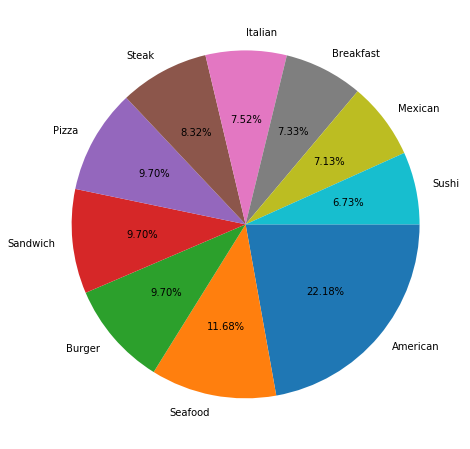

In [28]:
dfusa=df2[df2['Country Code']==216]
dfusa.Cuisines.fillna('Not Known',inplace=True)
us_val=df1["Cuisines"].value_counts()
#print(us_val)
usa=dict()
for i in dfusa['Cuisines']:
    a=i.split(',')
    for j in a:
        j=j.strip()
        if j in usa:
            usa[j]=usa[j]+1
        else:
            usa[j]=1
sorted_usa=sorted(usa.items(),key=lambda kv:kv[1], reverse=True)[:10]
x1=[]
x2=[]
for i in sorted_usa:
    print("     ",i[0],i[1])
    x1.append(i[0])
    x2.append(i[1])
figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
plt.pie(x2,labels=x1,autopct='%.2f%%',counterclock=False)
plt.show()

American is the top cuisine of the USA and it is served by 112 restaurants 

### 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

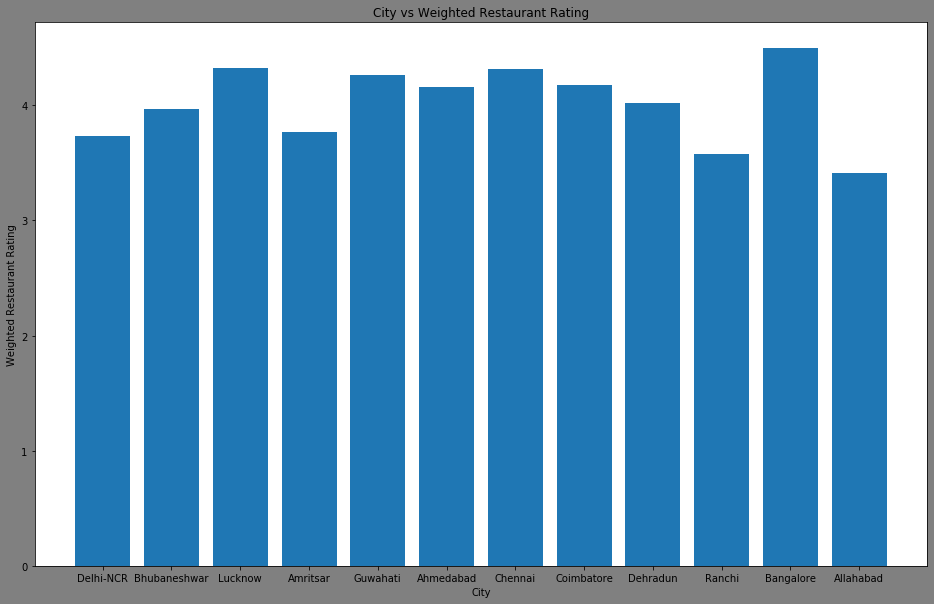

In [24]:
#zomato_india=zomato_data[zomato_data['Country Code']==1]
city_list=df1['City'].value_counts().index
data=list(zip(df1['City'],df1['Aggregate rating'],df1['Votes']))
weightage_rating=[]
for city in city_list:
    NRate=0
    Tvote=0
    for i in range(len(data)):
        if city in data[i][0]:
            NRate=NRate+(data[i][1]*data[i][2])
            Tvote=Tvote+data[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
figure(num=None, figsize=(16, 10), facecolor='gray', edgecolor='k')
plt.bar(city_list[0:12],weightage_rating[0:12])
plt.xlabel("City")
plt.ylabel("Weighted Restaurant Rating")
plt.title("City vs Weighted Restaurant Rating")
plt.show()